In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
sns.set_style("white")
sns.set_context("paper")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14

### Load data
#### Main SAU data file

In [2]:
def show_memory_alloc(df: pd.DataFrame) -> None:
    mem = round(df.memory_usage().sum()/1024/1024/1024, 2)
    print(f"{mem} GB")

In [3]:
t0 = datetime.now()
# --------------------- Load big dataset --------------------- #
file = "data/spatial catches of elasmobranchii in 2010-2018.csv"
df = pd.read_csv(file)
# ------------------------------------------------------------ #
t1 = datetime.now()
print(f"Time taken to load file: {(t1-t0).seconds}s, {(t1-t0).microseconds}ms")
df

Time taken to load file: 31s, 189579ms


,fishing_entity,cell_id,lon,lat,year,scientific_name,common_name,sector_type,catch_type,reporting_status,gear,sum
0,Algeria,73811,5.25,38.75,2010,Carcharhinidae,Requiem sharks,Industrial,Landings,Unreported,unknown class,0.000035
1,Algeria,73811,5.25,38.75,2010,Elasmobranchii,"Sharks, rays, skates",Industrial,Landings,Unreported,unknown class,0.032026
2,Algeria,73811,5.25,38.75,2010,Mustelus mustelus,Smooth-hound,Industrial,Landings,Reported,unknown class,0.000050
3,Algeria,73811,5.25,38.75,2011,Batoidea,"Batoids, skates, rays, sawfishes",Industrial,Landings,Unreported,unknown class,0.000004
4,Algeria,73811,5.25,38.75,2011,Carcharhinidae,Requiem sharks,Industrial,Landings,Unreported,unknown class,0.000034
...,...,...,...,...,...,...,...,...,...,...,...,...
31390122,Yemen,135089,44.25,-3.75,2014,Elasmobranchii,"Sharks, rays, skates",Industrial,Landings,Unreported,bottom trawl,0.150750
31390123,Yemen,135089,44.25,-3.75,2015,Elasmobranchii,"Sharks, rays, skates",Industrial,Landings,Unreported,bottom trawl,0.150750
31390124,Yemen,135089,44.25,-3.75,2016,Elasmobranchii,"Sharks, rays, skates",Industrial,Landings,Unreported,bottom trawl,0.150750
31390125,Yemen,135089,44.25,-3.75,2017,Elasmobranchii,"Sharks, rays, skates",Industrial,Landings,Unreported,bottom trawl,0.150750


In [4]:
show_memory_alloc(df)

2.81 GB


#### Other supplementary data

In [5]:
# Poste release mortality data
mortality = pd.read_excel("data/post_release_mortality.xlsx")

# Fate after bycatch data
bycatch_fate = pd.read_excel("data/bycatch_fate.xlsx")

# Taxonomy data
taxa = pd.read_csv("data/sau_spp_taxonomy_ref.csv")

# Gear data
gear = pd.read_excel("data/Gear_groups_SAUP.xlsx")

# List of true shark species
shark_species_data = pd.read_excel("data/List of true shark species_SAUP_2010-2018.xlsx", index_col=0)
shark_species_data.columns = [col.lower() for col in shark_species_data.columns]

### Graphs

### 8-February-2022

#### (a) Total elasmobranch and shark landings over the last 10 years according to the SAUP dataset

In [6]:
# All landing data
landings = df[df.catch_type == "Landings"]
l = landings.groupby("year")["sum"].sum()
show_memory_alloc(landings)

# All shark landing data
shark_list = shark_species_data.common_name
landings_shark = landings[landings["common_name"].isin(shark_list)]
l2 = landings_shark.groupby("year")["sum"].sum()
show_memory_alloc(landings_shark)

1.8 GB
1.42 GB


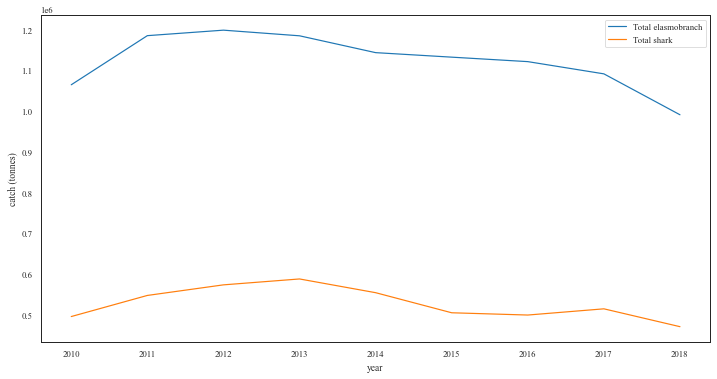

In [7]:
# Plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=l.index, y=l.values, label="Total elasmobranch")
sns.lineplot(x=l2.index, y=l2.values, label="Total shark")
plt.ylabel("catch (tonnes)")
plt.show()
# Save and clear memory
fig.savefig("outputs/total elasmobranch and shark landings over the last 10 years according to the SAUP dataset.jpg", dpi=300)

#### (b) Total elasmobranch and shark discards over the last 10 years according to the SAUP dataset. 

In [8]:
# All discard data
discards = df[df.catch_type == "Discards"]
d = discards.groupby("year")["sum"].sum()

# All shark discard data
discards_shark = discards[discards["common_name"].isin(shark_list)]
d2 = discards_shark.groupby("year")["sum"].sum()

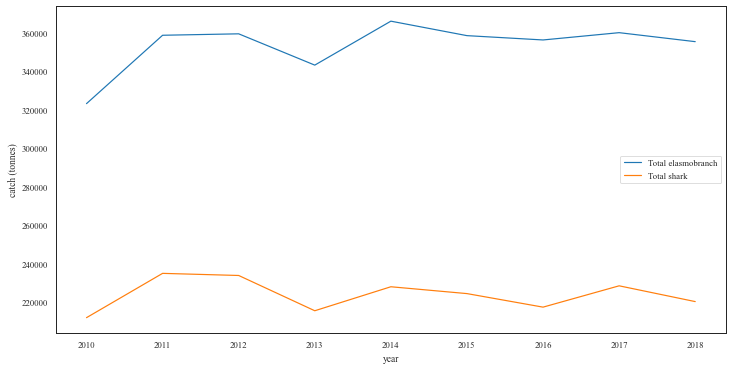

In [9]:
# Plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=d.index, y=d.values, label="Total elasmobranch")
sns.lineplot(x=d2.index, y=d2.values, label="Total shark")
plt.ylabel("catch (tonnes)")
plt.show()
# Save
fig.savefig("outputs/total elasmobranch and shark discards over the last 10 years according to the SAUP dataset.jpg", dpi=300)

#### (c) Average reported and unreported catch of sharks over the last 10 years according to the SAUP dataset

In [10]:
df_shark = df[df["common_name"].isin(shark_list)]
df_shark_reported = df_shark[df_shark.reporting_status == "Reported"].groupby("year")["sum"].sum()
df_shark_upreported = df_shark[df_shark.reporting_status == "Unreported"].groupby("year")["sum"].sum()

# All elasmobranch including sharks
df_unreported = df[df.reporting_status == "Unreported"].groupby("year")["sum"].sum()

- Stacked bar plot: reported vs unreported shark catch (2010-2018)

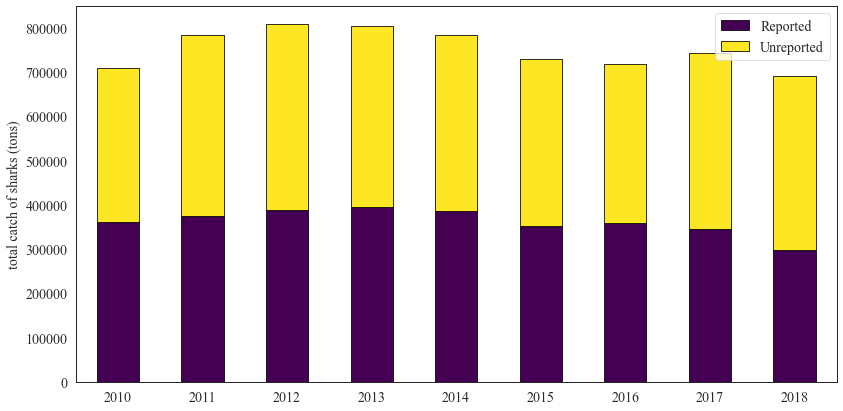

In [12]:
# Font settings
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

# Figure style
fsize = (12, 6)
cmap = "viridis"

# Plot
a = df_shark.pivot_table(
    index="year",
    columns="reporting_status",
    values="sum",
    aggfunc=np.sum,
)
a.plot(kind='bar', stacked=True, cmap=cmap, figsize=fsize, edgecolor="k")
plt.xlabel("")
plt.ylabel("total catch of sharks (tons)")
plt.ylabel("total catch of sharks (tons)", fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title="", prop={'size': 14})
plt.tight_layout()

# Save and clear memory
plt.savefig("outputs/total shark catch (2010-2018).jpg", dpi=300)

In [ ]:
# Plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=df_unreported.index, y=df_unreported.values, label="All elasmobranch")
sns.lineplot(x=df_shark_upreported.index, y=df_shark_upreported.values, label="Only sharks")
ax.set_title("Unreported")
plt.ylabel("catch (tonnes)")
plt.show()
# Save and clear memory
fig.savefig("outputs/average reported and unreported catch of sharks over the last 10 years according to the SAUP dataset.jpg", dpi=300)

#### (d) Map of total shark catch for the 176 countries and reported and unreported percentages over last ten years

In [ ]:
a = df_shark[["fishing_entity", "reporting_status", "sum"]]
pt = a.pivot_table(
    index="fishing_entity",
    columns="reporting_status",
    values="sum",
    aggfunc=np.sum
)
pt["total"] = pt.sum(axis=1)
pt = pt.reset_index()
pt

In [ ]:
# Save and clear memory
pt.to_excel("outputs/total shark catch for the 176 countries (2010-2018).xlsx")

### 9-10 February 2022

#### (a) Catch of shark species classified according to their family for the top 10 shark fishing nations over the last decade (SAUP, 2020).


In [ ]:
m = df_shark.merge(
    taxa[["common_name", "family_name", "order_name", "genus"]],
    on="common_name", how="left"
)
if len(m) == len(df_shark):
    print("Row lengths preserved! Validation successfull!")
    
    # Format data
    country_pivot = m.pivot_table(
        index="fishing_entity",
        columns="order_name",
        values="sum",
        aggfunc=np.sum,
    )
    # Add row total column
    country_pivot["total"] = country_pivot.sum(axis=1)
    
    # Show only top 10 results
    top_10 = country_pivot.sort_values(by="total", ascending=False).drop("total", axis=1).head(10)
    
    # Convert unit from tonnes to 1000 tonnes
    top_10 = top_10/1000
    
    # Save table to file
    top_10.to_excel("outputs/[pivot] shark catch of top 10 shark fishing nations grouped by order.xlsx")
else:
    print("Validation failed!")

In [ ]:
top_10

In [ ]:
# Font settings
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

# Figure style
fsize = (12, 12)
cmap = "viridis"

# Plot
ax = top_10.plot(kind='bar', stacked=True, cmap=cmap, figsize=fsize, edgecolor="k")
ax.legend(loc="upper right")
plt.xlabel("")
plt.ylabel("Total catch (thousands of tonnes)", fontsize=16)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title="", prop={'size': 16})

# Save
plt.savefig("outputs/shark catch of top 10 shark fishing nations grouped by order.jpg")

#### (b) Total catch of shark species in each type of gear used by the top 10 shark fishing nations over the last decade (SAUP, 2020).

In [ ]:
m2 = m.merge(
    gear, on="gear", how="left"
)

if len(m2) == len(df_shark):
    print("Row lengths preserved! Validation successfull!")
    # Format data
    country_pivot = m2.pivot_table(
        index="fishing_entity",
        columns="gear_group",
        values="sum",
        aggfunc=np.sum,
    )    
    # Add row total column
    country_pivot["total"] = country_pivot.sum(axis=1)
    
    # Show only top 10 results
    top_10 = country_pivot.sort_values(by="total", ascending=False).drop("total", axis=1).head(10)
    
    # Convert unit from tonnes to 1000 tonnes
    top_10 = top_10/1000
    
    # Save table to file
    top_10.to_excel("outputs/[pivot] shark catch of top 10 shark fishing nations grouped by gear.xlsx")
else:
    print("Validation failed!")

In [ ]:
# Font settings
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

# Figure style
fsize = (12, 12)
cmap = "mako"

# Plot
ax = top_10.plot(kind='bar', stacked=True, cmap=cmap, figsize=fsize, edgecolor="k")
ax.legend(loc="upper right")
plt.xlabel("")
plt.ylabel("Total catch (thousands of tonnes)", fontsize=16)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=12)
plt.legend(title="", prop={'size': 16})

# Save
plt.savefig("outputs/shark catch of top 10 shark fishing nations grouped by gear.jpg")

##### CMAPS:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'